In [1]:
import numpy as np
import h5py

import matplotlib.pyplot as plt
%matplotlib inline

from math import *

In [ ]:
arrays = {}
f = h5py.File('mnist.mat')
for k, v in f.items():
    arrays[k] = np.array(v)

In [ ]:
arrays.keys()

dict_keys(['digits_test', 'digits_train', 'labels_test', 'labels_train'])

In [ ]:
#Use the entire training set of 60000 examples
len(arrays['digits_train'])

60000

In [ ]:
#Each image is stored as a matrix (28×28) of numbers
arrays['digits_train'][0].shape

(28, 28)

In [2]:
#You can visualize these images (or matrices) using the functions imagesc() or imshow().
from keras.datasets import mnist
(digits_train, labels_train), (digits_test, labels_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Label: 8


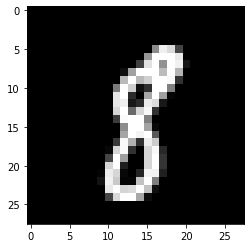

In [3]:
print('Label:',labels_train[300])
plt.gray()
plt.imshow(digits_train[300])

As of now, for each digit, each 28 × 28 pixel image is represented using 28^2 coordinate values in the Euclidean space of dimension 28^2. Suppose you decide to re-represent the images using only 84 coordinates (instead of 28^2 = 784) in a 84-dimensional basis for some 84-dimensional hyperplane within the original Euclidean space, such that the chosen 84-dimensional hyperplane maximizes the total dispersion of the original data (for the chosen digit) within the hyperplane.

**a) Write a function to compute those 84 coordinates, for each of the ten digits (0–9).**

In [4]:
#Convert each 28×28 pixel image matrix to a 28^2 × 1 vector by concatenating its columns.
reshaped_digits_train = []
for i in range(len(digits_train)):
    reshaped_digits_train.append(digits_train[i].reshape((28*28,1)))

In [5]:
#Training data specific to one digit
def digit_dataset(digit,train_data):
    sample =  []
    for i in range(len(labels_train)):
        if labels_train[i]==digit:
            sample.append(train_data[i])        
    return sample

def compute_data_matrix(dataset):
  D = []
  n = len(dataset)
  for p in range(784):
    d = []
    for i in range(n):
      d.append(dataset[i][p][0])
    D.append(d)
  return D

def centering(dataset,mu):
  D = []
  for i in range(784):
    D.append([d-mu[i][0] for d in dataset[i]])
  return np.array(D)

def compute_mean(dataset):
    mean = []
    n = len(dataset)
    for p in range(784):
        s=0
        for i in range(n):
            s += dataset[i][p][0]
        m = s/n
        mean.append([m])
        mu = np.array(mean)
    return mu

def compute_covariance(D_centered,n):
    CC = (np.matmul(D_centered,np.transpose(D_centered)))/(n-1)
    return CC

In [27]:
def find_coordinates(eig_val,eig_vec,no_of_components,c_dataset):
  # sorting in decreasing order
  i = np.argsort(eig_val)[::-1]
  eig_vec_desc = eig_vec[:,i]
  eig_val_desc = eig_val[i]

  # selecting the first 84 eigenvectors after sorting
  top84_eig_vec = eig_vec_desc[:, :no_of_components]

  coordinates = np.matmul(np.transpose(top84_eig_vec),c_dataset)

  return top84_eig_vec,coordinates

<b>b) (5 points) Give an algorithm for regenerating / reconstructing the image using those 84 coordinates (and the knowledge of the designed 84-dimensional basis). For each of the ten digits (0–9), pick an image, and show the original and the reconstructed images side by side.</b>

Algorithm:<br>
The 84 principal eigenvectors corresponding to the top 84 eigenvalues form the 84 dimensional basis. In this 84-dimensional hyperplane, we have obtained the coordinates for images in the previous subpart of the question.<br>
v = 84 principal eigenvectors (direction)<br>
c = coordinates(computed in previous subpart)<br>

1)We multiply matrices v and c. This is equivalent to taking linear combination of the top 84 eigenvectors in v where the coefficients are determined by columns in C. <br>

2)Now we add the mean to the result in step 1.In this resultant matrix,each column is a reconstructed image. <br>

Digit 0:

In [22]:
#-------Part a--------
dataset0 = digit_dataset(0,reshaped_digits_train) #Dataset for a specific digit
mu0 = compute_mean(dataset0) #Computing mean
re_mu0 = mu0.reshape(28,28) #Reshaping back the mean

D0 = compute_data_matrix(dataset0) #Computing the data matrix
DC0 = centering(D0,mu0) #Centering the data
D0_arr = np.array(D0)

n = len(dataset0)
CC0 = compute_covariance(DC0,n) #Computing compute_covariance
eig_val_0, eig_vec_0 = np.linalg.eigh(CC0) #Eigen decomposition

In [28]:
top84_eig_vec0,coordinates0 = find_coordinates(eig_val_0,eig_vec_0,84,DC0)

In [33]:
print('Coordinates for 0:\n',coordinates0)

Coordinates for 0:
 [[ 454.36574673  329.81136667 1244.02148622 ...  936.01525987
  1202.41711716  875.24132169]
 [ 357.71468028  637.61782036 -605.61504516 ...  533.25229798
   669.6294669  1003.13968328]
 [ 286.38489665  209.54335115  -61.77420629 ... -836.0239771
  -557.53784095 -654.55945733]
 ...
 [ -34.96395489   11.30840406   80.71655508 ...  -36.09717639
    24.8987316   153.37652808]
 [   2.76168505  -17.47496067 -123.55205176 ...  -83.55292491
    17.11139456   58.04724202]
 [  55.05881006   -6.64220228  -60.04242071 ...  -34.60461382
   -81.7100165   -12.98524368]]


In [35]:
#-------Part b--------
lin_com_0 = np.matmul(top84_eig_vec0,coordinates0) #linear combination of top 84 eigenvectors
reconstructed_0 = lin_com_0 + mu0 #Adding the mean to the linear combination of eigenvectors, to get the reconstructed image

Text(0.5, 1.0, 'Reconstructed Image')

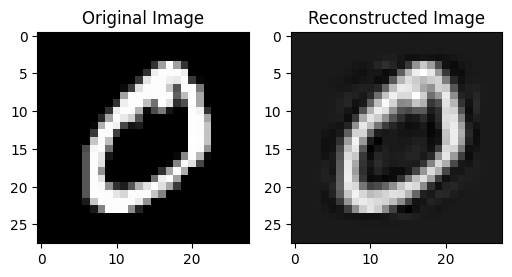

In [44]:
plt.figure(dpi=100)
plt.subplot(1,2,1)
original_img = D0_arr[:,0].reshape(28,28)
plt.imshow(original_img)
plt.title('Original Image')
plt.subplot(1,2,2)
reconstructed_img = reconstructed_0[:,0].reshape(28,28)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')

Digit 1

In [34]:
#-------Part a--------
dataset1 = digit_dataset(1,reshaped_digits_train) #Dataset for specific digit
mu1 = compute_mean(dataset1) #Computing mean
re_mu1 = mu1.reshape(28,28) #Reshaping back the mean

D1 = compute_data_matrix(dataset1) #Computing the data matrix
DC1 = centering(D1,mu1) #Centering the data
D1_arr = np.array(D1)

n = len(dataset1)
CC1 = compute_covariance(DC1,n) #Computing compute_covariance
eig_val_1, eig_vec_1 = np.linalg.eigh(CC1) #Eigen decomposition

top84_eig_vec1,coordinates1 = find_coordinates(eig_val_1,eig_vec_1,84,DC1)

print('Coordinates for 1:\n',coordinates1)

Coordinates for 1:
 [[-1112.55680193   971.64265205   835.4594532  ...  -794.38466464
   -837.35162224  -576.23766822]
 [ -380.4316953   -611.1539768   -522.31206454 ...  -345.30148622
   -957.37129197  -529.89251908]
 [  -32.42288805  -323.29579589   139.55044545 ...   226.90863817
    186.66900016   521.57783431]
 ...
 [   -9.97244388    12.98361565    30.76377554 ...     4.43178141
    -63.9099696      6.897864  ]
 [    4.05516668    12.88557658    17.68838078 ...    -6.09896523
     12.76030962    -4.97461342]
 [   28.23201703    -4.63229303   -16.46458139 ...   -47.28955072
    -39.80073633    56.10531037]]


Text(0.5, 1.0, 'Reconstructed Image')

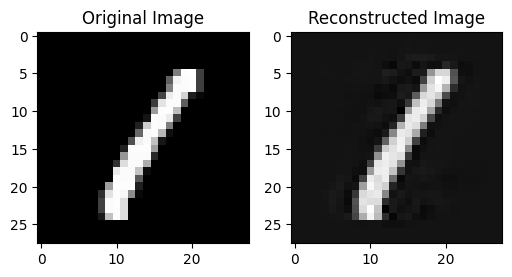

In [43]:
#-------Part b--------
lin_com_1 = np.matmul(top84_eig_vec1,coordinates1) #linear combination of top 84 eigenvectors
reconstructed_1 = lin_com_1 + mu1 #Adding the mean to the linear combination of eigenvectors, to get the reconstructed image

plt.figure(dpi=100)
plt.subplot(1,2,1)
original_img = D1_arr[:,0].reshape(28,28)
plt.imshow(original_img)
plt.title('Original Image')
plt.subplot(1,2,2)
reconstructed_img = reconstructed_1[:,0].reshape(28,28)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')

Digit 2:

In [38]:
#-------Part a--------
dataset2 = digit_dataset(2,reshaped_digits_train) #Dataset for specific digit
mu2 = compute_mean(dataset2) #Computing mean
re_mu2 = mu2.reshape(28,28) #Reshaping back the mean

D2 = compute_data_matrix(dataset2) #Computing the data matrix
DC2 = centering(D2,mu2) #Centering the data
D2_arr = np.array(D2)

n = len(dataset2)
CC2 = compute_covariance(DC2,n) #Computing compute_covariance
eig_val_2, eig_vec_2 = np.linalg.eigh(CC2) #Eigen decomposition

top84_eig_vec2,coordinates2 = find_coordinates(eig_val_2,eig_vec_2,84,DC2)

print('Coordinates for 2:\n',coordinates2)

Coordinates for 1:
 [[ -651.94371296  -147.42654481   322.06548162 ...  -846.04267703
  -1315.87039711  -831.60896258]
 [ -396.20673105   -12.80748308   947.01872892 ...  -559.69783294
   -280.38748689  -386.9386877 ]
 [ -152.6111445    151.22545618  -408.63542183 ...    98.17432916
     63.61379335   653.2302977 ]
 ...
 [   -4.0957559      7.18933932    -9.52073833 ...   -12.12606771
     56.29119618   113.99670819]
 [   23.98038237    67.98223363    18.67057563 ...   -13.62447486
     46.37648105    37.14905935]
 [  -37.53822031    75.95200539   -38.74256192 ...   -15.46082367
    -73.74627017   119.29670588]]


Text(0.5, 1.0, 'Reconstructed Image')

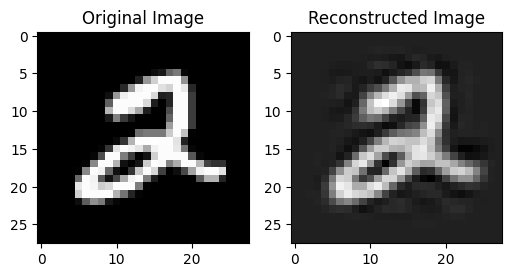

In [42]:
#-------Part b--------
lin_com_2 = np.matmul(top84_eig_vec2,coordinates2) #linear combination of top 84 eigenvectors
reconstructed_2 = lin_com_2 + mu2 #Adding the mean to the linear combination of eigenvectors, to get the reconstructed image

plt.figure(dpi=100)
plt.subplot(1,2,1)
original_img = D2_arr[:,0].reshape(28,28)
plt.imshow(original_img)
plt.title('Original Image')
plt.subplot(1,2,2)
reconstructed_img = reconstructed_2[:,0].reshape(28,28)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')

Digit 3:

In [40]:
#-------Part a--------
dataset3 = digit_dataset(3,reshaped_digits_train) #Dataset for specific digit
mu3 = compute_mean(dataset3) #Computing mean
re_mu3 = mu3.reshape(28,28) #Reshaping back the mean

D3 = compute_data_matrix(dataset3) #Computing the data matrix
DC3 = centering(D3,mu3) #Centering the data
D3_arr = np.array(D3)

n = len(dataset3)
CC3 = compute_covariance(DC3,n) #Computing compute_covariance
eig_val_3, eig_vec_3 = np.linalg.eigh(CC3) #Eigen decomposition

top84_eig_vec3,coordinates3 = find_coordinates(eig_val_3,eig_vec_3,84,DC3)

print('Coordinates for 3:\n',coordinates3)

Coordinates for 1:
 [[  936.71091344   412.68401064 -1061.98257961 ...   508.08020195
    712.08041733   963.10966111]
 [  404.61829742  -104.48187184  -464.9124395  ...   103.72687693
   -516.90808674   -46.00062144]
 [ -894.5910433    282.43943237  -405.2013435  ...  -711.13369461
    638.50284228   -67.08585228]
 ...
 [  -72.50832845   -32.70707156    54.08653806 ...    61.84228962
    -26.89303669    44.61354079]
 [  -56.20196064   -91.63281517   124.68341781 ...    71.98247892
    -44.86338882   -33.3377392 ]
 [    5.54701943   -41.7664051     34.74153373 ...     2.58755568
    -51.10724825    30.98798504]]


Text(0.5, 1.0, 'Reconstructed Image')

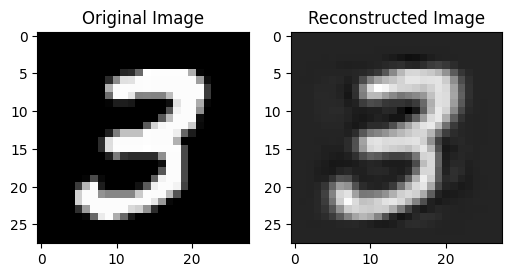

In [41]:
#-------Part b--------
lin_com_3 = np.matmul(top84_eig_vec3,coordinates3) #linear combination of top 84 eigenvectors
reconstructed_3 = lin_com_3 + mu3 #Adding the mean to the linear combination of eigenvectors, to get the reconstructed image

plt.figure(dpi=100)
plt.subplot(1,2,1)
original_img = D3_arr[:,0].reshape(28,28)
plt.imshow(original_img)
plt.title('Original Image')
plt.subplot(1,2,2)
reconstructed_img = reconstructed_3[:,0].reshape(28,28)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')

Digit 4:

In [45]:
#-------Part a--------
dataset4 = digit_dataset(4,reshaped_digits_train) #Dataset for specific digit
mu4 = compute_mean(dataset4) #Computing mean
re_mu4 = mu4.reshape(28,28) #Reshaping back the mean

D4 = compute_data_matrix(dataset4) #Computing the data matrix
DC4 = centering(D4,mu4) #Centering the data
D4_arr = np.array(D4)

n = len(dataset4)
CC4 = compute_covariance(DC4,n) #Computing compute_covariance
eig_val_4, eig_vec_4 = np.linalg.eigh(CC4) #Eigen decomposition

top84_eig_vec4,coordinates4 = find_coordinates(eig_val_4,eig_vec_4,84,DC4)

print('Coordinates for 4:\n',coordinates4)

Coordinates for 1:
 [[-547.01649279  616.79769948 -996.1980674  ...  686.9318474
   465.3971596   446.35568624]
 [-206.94067245 -551.39137795  -42.83240906 ... -455.14770048
  -601.09327561  146.57558358]
 [ 496.26132713  461.03788937  421.75334879 ...  272.17484636
   756.82158854  668.83177053]
 ...
 [  66.81278907  -15.32652826   12.824897   ...   27.73584165
   -29.58075646  -73.4155814 ]
 [  91.41906851    6.94366896   48.29486634 ...   52.57714836
    -5.93055773  -26.40796551]
 [-111.64786929  -51.48034337  -13.18077501 ...  -27.1743651
    10.0577521    36.27875486]]


Text(0.5, 1.0, 'Reconstructed Image')

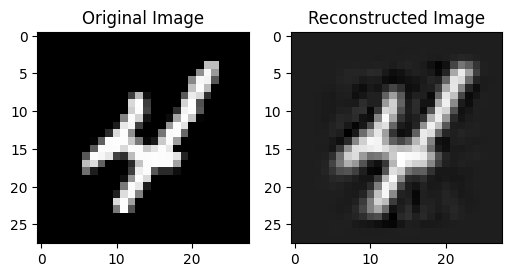

In [47]:
#-------Part b--------
lin_com_4 = np.matmul(top84_eig_vec4,coordinates4) #linear combination of top 84 eigenvectors
reconstructed_4 = lin_com_4 + mu4 #Adding the mean to the linear combination of eigenvectors, to get the reconstructed image

plt.figure(dpi=100)
plt.subplot(1,2,1)
original_img = D4_arr[:,1].reshape(28,28)
plt.imshow(original_img)
plt.title('Original Image')
plt.subplot(1,2,2)
reconstructed_img = reconstructed_4[:,1].reshape(28,28)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')

Digit 5:

In [48]:
#-------Part a--------
dataset5 = digit_dataset(5,reshaped_digits_train) #Dataset for specific digit
mu5 = compute_mean(dataset5) #Computing mean
re_mu5 = mu5.reshape(28,28) #Reshaping back the mean

D5 = compute_data_matrix(dataset5) #Computing the data matrix
DC5 = centering(D5,mu5) #Centering the data
D5_arr = np.array(D5)

n = len(dataset5)
CC5 = compute_covariance(DC5,n) #Computing compute_covariance
eig_val_5, eig_vec_5 = np.linalg.eigh(CC5) #Eigen decomposition

top84_eig_vec5,coordinates5 = find_coordinates(eig_val_5,eig_vec_5,84,DC5)

print('Coordinates for 5:\n',coordinates5)

Coordinates for 1:
 [[-181.65047485 1057.19551883  976.89071977 ...  482.49135978
   667.15686391  -72.79192322]
 [ 538.97881936 -921.08929102 -401.08795317 ...  -95.4378267
  -244.22314747  583.31063966]
 [-486.373132    264.72616888  -22.58305695 ... -398.61461262
   -91.35183836  198.63365085]
 ...
 [  45.82947436   21.43196096   18.64776995 ...   21.64778868
    95.65466268 -126.32154251]
 [  10.20014752  -18.26743806 -115.33046157 ...   42.42766925
   101.2386494    99.41736793]
 [-147.19288134  -14.22084501   26.73527239 ...   33.29085768
   101.85852716 -111.71174384]]


Text(0.5, 1.0, 'Reconstructed Image')

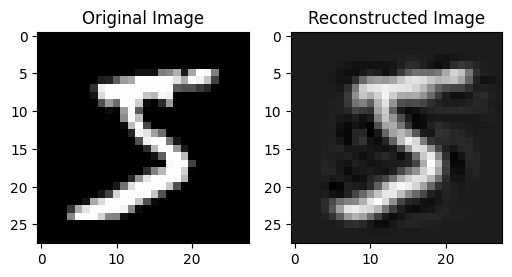

In [50]:
#-------Part b--------
lin_com_5 = np.matmul(top84_eig_vec5,coordinates5) #linear combination of top 84 eigenvectors
reconstructed_5 = lin_com_5 + mu5 #Adding the mean to the linear combination of eigenvectors, to get the reconstructed image

plt.figure(dpi=100)
plt.subplot(1,2,1)
original_img = D5_arr[:,0].reshape(28,28)
plt.imshow(original_img)
plt.title('Original Image')
plt.subplot(1,2,2)
reconstructed_img = reconstructed_5[:,0].reshape(28,28)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')

Digit 6:

In [51]:
#-------Part a--------
dataset6 = digit_dataset(6,reshaped_digits_train) #Dataset for specific digit
mu6 = compute_mean(dataset6) #Computing mean
re_mu6 = mu6.reshape(28,28) #Reshaping back the mean

D6 = compute_data_matrix(dataset6) #Computing the data matrix
DC6 = centering(D6,mu6) #Centering the data
D6_arr = np.array(D6)

n = len(dataset6)
CC6 = compute_covariance(DC6,n) #Computing compute_covariance
eig_val_6, eig_vec_6 = np.linalg.eigh(CC6) #Eigen decomposition

top84_eig_vec6,coordinates6 = find_coordinates(eig_val_6,eig_vec_6,84,DC6)

print('Coordinates for 6:\n',coordinates6)

Coordinates for 1:
 [[-149.41432742  504.18820552   53.11848658 ...  317.38622347
   556.63759721  367.63840278]
 [ 659.00191625 -268.02984863   77.90309182 ... -361.06351163
   -17.61791643 -160.56378227]
 [-173.4970301   580.98011149  737.80950772 ... -716.67669713
  -767.7233533  -562.82080662]
 ...
 [ -37.66486426   17.84932656   18.42850825 ...  -53.51289298
   -96.40691582 -122.92957369]
 [ -38.11842275    7.15544516  101.40965382 ...  -54.31943604
  -112.63057459   36.8759815 ]
 [ -50.98254647   10.03711156  -20.55519598 ...   33.88150209
   -72.5935723    34.84012551]]


Text(0.5, 1.0, 'Reconstructed Image')

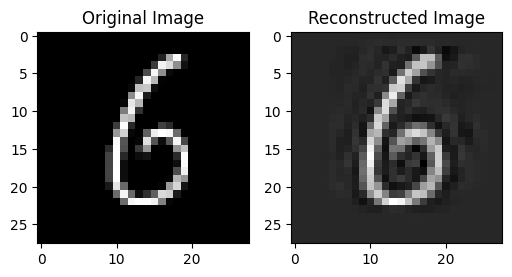

In [52]:
#-------Part b--------
lin_com_6 = np.matmul(top84_eig_vec6,coordinates6) #linear combination of top 84 eigenvectors
reconstructed_6 = lin_com_6 + mu6 #Adding the mean to the linear combination of eigenvectors, to get the reconstructed image

plt.figure(dpi=100)
plt.subplot(1,2,1)
original_img = D6_arr[:,1].reshape(28,28)
plt.imshow(original_img)
plt.title('Original Image')
plt.subplot(1,2,2)
reconstructed_img = reconstructed_6[:,1].reshape(28,28)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')

Digit 7:

In [53]:
#-------Part a--------
dataset7 = digit_dataset(7,reshaped_digits_train) #Dataset for specific digit
mu7 = compute_mean(dataset7) #Computing mean
re_mu7 = mu7.reshape(28,28) #Reshaping back the mean

D7 = compute_data_matrix(dataset7) #Computing the data matrix
DC7 = centering(D7,mu7) #Centering the data
D7_arr = np.array(D7)

n = len(dataset7)
CC7 = compute_covariance(DC7,n) #Computing compute_covariance
eig_val_7, eig_vec_7 = np.linalg.eigh(CC7) #Eigen decomposition

top84_eig_vec7,coordinates7 = find_coordinates(eig_val_7,eig_vec_7,84,DC7)

print('Coordinates for 7:\n',coordinates7)

Coordinates for 7:
 [[-602.63295225 -344.5047332   184.22375484 ... -728.51959474
  -728.65260395 -240.47412065]
 [-896.05407054  -28.27723896  813.40192494 ... -429.82771487
   182.67074173 -837.68155584]
 [ 139.38578923  928.23374036  141.44988423 ...  536.04894279
    52.03375064  887.60971671]
 ...
 [ -23.87034667   40.84435106  -54.5562487  ...  -48.07113661
    36.45292448   28.2447018 ]
 [  20.45883817   55.53291461   42.26900014 ...   -1.71658725
     7.84684272   48.73026576]
 [  81.06438265   50.48868599  -43.20363816 ...  -44.99569844
    48.94255979   12.93421609]]


Text(0.5, 1.0, 'Reconstructed Image')

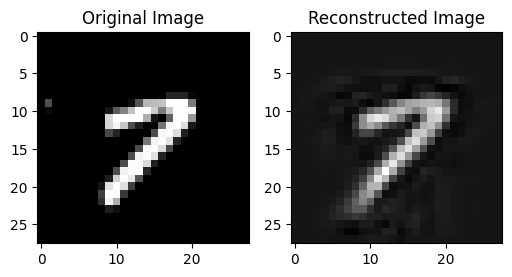

In [54]:
#-------Part b--------
lin_com_7 = np.matmul(top84_eig_vec7,coordinates7) #linear combination of top 84 eigenvectors
reconstructed_7 = lin_com_7 + mu7 #Adding the mean to the linear combination of eigenvectors, to get the reconstructed image

plt.figure(dpi=100)
plt.subplot(1,2,1)
original_img = D7_arr[:,1].reshape(28,28)
plt.imshow(original_img)
plt.title('Original Image')
plt.subplot(1,2,2)
reconstructed_img = reconstructed_7[:,1].reshape(28,28)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')

Digit 8:

In [55]:
#-------Part a--------
dataset8 = digit_dataset(8,reshaped_digits_train) #Dataset for specific digit
mu8 = compute_mean(dataset8) #Computing mean
re_mu8 = mu8.reshape(28,28) #Reshaping back the mean

D8 = compute_data_matrix(dataset8) #Computing the data matrix
DC8 = centering(D8,mu8) #Centering the data
D8_arr = np.array(D8)

n = len(dataset8)
CC8 = compute_covariance(DC8,n) #Computing compute_covariance
eig_val_8, eig_vec_8 = np.linalg.eigh(CC8) #Eigen decomposition

top84_eig_vec8,coordinates8 = find_coordinates(eig_val_8,eig_vec_8,84,DC8)

print('Coordinates for 8:\n',coordinates8)

Coordinates for 8:
 [[ 8.56543522e+02  1.05895227e+03  3.91856081e+02 ...  7.77405418e+02
   5.36087576e+02  6.61888626e+02]
 [ 2.29289149e+02  5.09383916e-01  2.15200992e+02 ...  1.47409727e+02
   1.85018333e+02  2.45656033e+02]
 [-4.70950945e+01 -5.80657117e+02  6.34788398e+02 ... -3.11002290e+02
   6.94517866e+01 -7.27734242e+02]
 ...
 [ 1.14331381e+02 -2.98506547e+01 -9.54927824e+00 ...  3.43639451e+01
  -5.93351576e+01  7.40467542e+01]
 [ 6.93906058e+01  1.20298672e+01 -3.76962678e+00 ...  1.45591304e+01
  -7.31799648e+01  1.82747135e+00]
 [-1.34853567e+01 -2.45718248e+01 -1.89223550e+01 ...  8.72365270e+01
   4.99155441e+00  1.01318025e+01]]


Text(0.5, 1.0, 'Reconstructed Image')

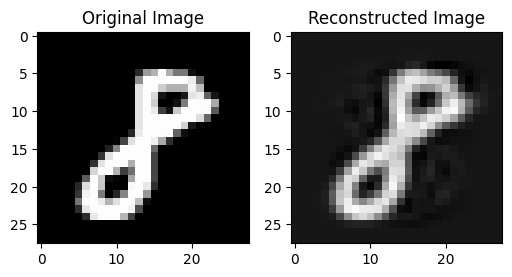

In [56]:
#-------Part b--------
lin_com_8 = np.matmul(top84_eig_vec8,coordinates8) #linear combination of top 84 eigenvectors
reconstructed_8 = lin_com_8 + mu8 #Adding the mean to the linear combination of eigenvectors, to get the reconstructed image

plt.figure(dpi=100)
plt.subplot(1,2,1)
original_img = D8_arr[:,1].reshape(28,28)
plt.imshow(original_img)
plt.title('Original Image')
plt.subplot(1,2,2)
reconstructed_img = reconstructed_8[:,1].reshape(28,28)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')

Digit 9:

In [57]:
#-------Part a--------
dataset9 = digit_dataset(9,reshaped_digits_train) #Dataset for specific digit
mu9 = compute_mean(dataset9) #Computing mean
re_mu9 = mu9.reshape(28,28) #Reshaping back the mean

D9 = compute_data_matrix(dataset9) #Computing the data matrix
DC9 = centering(D9,mu9) #Centering the data
D9_arr = np.array(D9)

n = len(dataset9)
CC9 = compute_covariance(DC9,n) #Computing compute_covariance
eig_val_9, eig_vec_9 = np.linalg.eigh(CC9) #Eigen decomposition

top84_eig_vec9,coordinates9 = find_coordinates(eig_val_9,eig_vec_9,84,DC9)

print('Coordinates for 9:\n',coordinates5)

Coordinates for 9:
 [[-181.65047485 1057.19551883  976.89071977 ...  482.49135978
   667.15686391  -72.79192322]
 [ 538.97881936 -921.08929102 -401.08795317 ...  -95.4378267
  -244.22314747  583.31063966]
 [-486.373132    264.72616888  -22.58305695 ... -398.61461262
   -91.35183836  198.63365085]
 ...
 [  45.82947436   21.43196096   18.64776995 ...   21.64778868
    95.65466268 -126.32154251]
 [  10.20014752  -18.26743806 -115.33046157 ...   42.42766925
   101.2386494    99.41736793]
 [-147.19288134  -14.22084501   26.73527239 ...   33.29085768
   101.85852716 -111.71174384]]


Text(0.5, 1.0, 'Reconstructed Image')

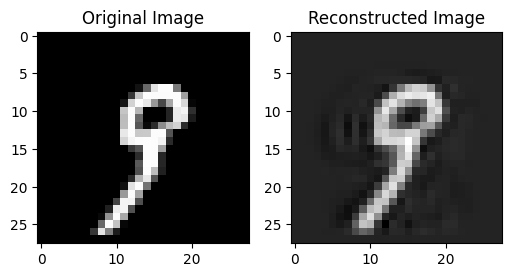

In [58]:
#-------Part b--------
lin_com_9 = np.matmul(top84_eig_vec9,coordinates9) #linear combination of top 84 eigenvectors
reconstructed_9 = lin_com_9 + mu9 #Adding the mean to the linear combination of eigenvectors, to get the reconstructed image

plt.figure(dpi=100)
plt.subplot(1,2,1)
original_img = D9_arr[:,1].reshape(28,28)
plt.imshow(original_img)
plt.title('Original Image')
plt.subplot(1,2,2)
reconstructed_img = reconstructed_9[:,1].reshape(28,28)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')